# 美国2012年总统候选人政治献金数据分析

导入包

In [276]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

方便大家操作，将月份和参选人以及所在政党进行定义

In [277]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

读取文件

In [278]:
ele = pd.read_csv('usa_election.txt')
ele

d:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


查看文件样式以及基本信息

In [279]:
ele.dtypes

cmte_id               object
cand_id               object
cand_nm               object
contbr_nm             object
contbr_city           object
contbr_st             object
contbr_zip            object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
receipt_desc          object
memo_cd               object
memo_text             object
form_tp               object
file_num               int64
dtype: object

In [280]:
ele.shape

(536041, 16)

In [281]:
ele.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


【知识点】使用map函数+字典，新建一列各个候选人所在党派party

In [282]:
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }
ele['party'] = ele.cand_nm.map(parties)

In [283]:
ele

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


查看单独一行，是否加上了'party'一列

In [284]:
ele[['party']]

,party
0,Republican
1,Republican
2,Republican
3,Republican
4,Republican
5,Republican
6,Republican
7,Republican
8,Republican
9,Republican


使用np.unique()函数查看colums：party这一列中有哪些元素

In [285]:
ele['party'].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

使用value_counts()函数，统计party列中各个元素出现次数

In [286]:
ele['party'].value_counts()

Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: party, dtype: int64

【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [287]:
ele.groupby('contb_receipt_amt')

In [288]:
ele.groupby(['party']).sum()

,contb_receipt_amt,file_num
party,,
Democrat,8.105758e+07,222412658564
Libertarian,4.132769e+05,532194207
Reform,3.390338e+05,4043966457
Republican,1.192255e+08,181191450909


查看具体每天各个党派收到的政治献金总数contb_receipt_amt  
使用groupby([多个分组参数])

In [289]:
ele.groupby(['party','contb_receipt_dt']).sum()

contb_receipt_amt    file_num
party      contb_receipt_dt                               
Democrat   01-AUG-11                 175281.00   541589922
           01-DEC-11                 651532.82  3101022283
           01-JAN-12                  58098.80   599430370
           01-JUL-11                 165961.00   401551758
           01-JUN-11                 145459.00   363013699
           01-MAY-11                  82644.00    93014322
           01-NOV-11                 122529.87   600664371
           01-OCT-11                 148977.00   622034895
           01-SEP-11                 403297.62  1554228548
           02-AUG-11                 164510.11   347925895
           02-DEC-11                 216056.96  1154771529
           02-JAN-12                  89743.60   296649045
           02-JUL-11                  17105.00    90746160
           02-JUN-11                 422453.00  1003895391
           02-MAY-11                 396675.00   478865990
           02-NOV-11                 147183.81   464045664
           02-OCT-11                  62605.62   209892377
           02-SEP-11                 137948.41   319932210
           03-AUG-11                 147053.02   501438149
           03-DEC-11                  81304.02   445728072
           03-JAN-12                  87406.97   357971845
           03-JUL-11                   5982.00    54447696
           03-JUN-11                 320176.20   402560655
           03-MAY-11                 261819.11   314681650
           03-NOV-11                 119304.56   347271015
           03-OCT-11                 363061.02   475494159
           03-SEP-11                  45598.00   171661486
           04-APR-11                 640235.12  1459631357
           04-AUG-11                 598784.23  3015866712
           04-DEC-11                  72795.10   614402565
...                                        ...         ...
Republican 29-AUG-11                 941769.23   620179105
           29-DEC-11                 428501.42   973136637
           29-JAN-11                    750.00     1511580
           29-JAN-12                  75220.02   156498844
           29-JUL-11                 233423.35   300104906
           29-JUN-11                1340704.29  1022121623
           29-MAR-11                  38875.00    29462762
           29-MAY-11                   8363.20    12059619
           29-NOV-11                 407322.64   974872391
           29-OCT-11                  81924.01   232865384
           29-SEP-11                1612794.52  1913040925
           30-APR-11                  43004.80    35712303
           30-AUG-11                 915548.58   500936064
           30-DEC-11                 492470.45  1284437183
           30-JAN-12                 255204.80   747205924
           30-JUL-11                  12249.04    42612918
           30-JUN-11                2744932.63  2404951978
           30-MAR-11                  50240.00    44062096
           30-MAY-11                  17803.60    21978037
           30-NOV-11                 809014.83  1384609909
           30-OCT-11                  43913.16   142085230
           30-SEP-11                4886331.76  5112699636
           31-AUG-11                1017735.02   530420241
           31-DEC-11                1094376.72  2280497372
           31-JAN-11                   6000.00     2267370
           31-JAN-12                 869890.41  1432253872
           31-JUL-11                  12781.02    37810589
           31-MAR-11                  62475.00    33188284
           31-MAY-11                 301339.80   175700853
           31-OCT-11                 734601.83   875919196

[1183 rows x 2 columns]

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [290]:
ele[['contb_receipt_dt']].dtypes

contb_receipt_dt    object
dtype: object

In [291]:
def date(x):
    day,mon,year = x.split('-')
    p_date = "20"+year+'-'+str(months[mon])+'-'+day
    return p_date

In [292]:
ele['contb_receipt_dt'] = ele['contb_receipt_dt'].map(date)

查看是否转换成功

In [293]:
ele.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,2011-6-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,2011-6-23,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-7-05,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,2011-8-01,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,2011-6-20,NaN,NaN,NaN,SA17A,736166,Republican


将时间转换为时间数据类型  
根据时间进行排序

In [294]:
ele.contb_receipt_dt = pd.to_datetime(ele.contb_receipt_dt)
ele.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,2011-06-23,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,2011-07-05,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,2011-08-01,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,2011-06-20,NaN,NaN,NaN,SA17A,736166,Republican


In [295]:
ele.sort_values('contb_receipt_dt',inplace=True)
ele

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
478480,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475327,C00496067,P00003608,"Cain, Herman","STOLTENBERG, WAYNE",WESTLAKE,TX,762629076,CINCO RESOURCES,CFO,5200.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475328,C00496067,P00003608,"Cain, Herman","TRIBBLE, JAMES",HOUSTON,TX,770795026,NONE,RETIRED,1000.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
478481,C00496067,P00003608,"Cain, Herman","SIDNEY, SCOTT",CEDARBURG,WI,530122317,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
475329,C00496067,P00003608,"Cain, Herman","DAVIS, JEREMY S MR.",HOUSTON,TX,770252267,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
469861,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
469860,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
478476,C00496067,P00003608,"Cain, Herman","ANDINGF, AL",MONONA,WI,537162503,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463851,C00496067,P00003608,"Cain, Herman","MANN, KEITH",UNIVERSITY PARK,FL,342012269,US ARMY,SOLDIER,500.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463850,C00496067,P00003608,"Cain, Herman","COOPER, ROBERT",ORLANDO,FL,328264121,TEAM HEALTH,PHYSICIAN,250.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican


得到转换后的，每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

In [296]:
ele_s = ele.groupby(['party','contb_receipt_dt'])[['contb_receipt_amt']].sum()
ele_s

contb_receipt_amt
party      contb_receipt_dt                   
Democrat   2011-04-04                640235.12
           2011-04-05                307641.00
           2011-04-06                247542.59
           2011-04-07                252336.00
           2011-04-08                295452.00
           2011-04-09                105879.00
           2011-04-10                100373.00
           2011-04-11                360728.00
           2011-04-12                405160.46
           2011-04-13                382836.33
           2011-04-14                306643.50
           2011-04-15                408377.00
           2011-04-16                 82658.00
           2011-04-17                 70802.00
           2011-04-18                501971.37
           2011-04-19                304874.00
           2011-04-20                314540.11
           2011-04-21                315618.00
           2011-04-22                295464.45
           2011-04-23                 34829.00
           2011-04-24                 37100.00
           2011-04-25                447282.00
           2011-04-26                600960.50
           2011-04-27                188595.00
           2011-04-28                677041.36
           2011-04-29                294709.00
           2011-04-30                 95582.00
           2011-05-01                 82644.00
           2011-05-02                396675.00
           2011-05-03                261819.11
...                                        ...
Republican 2012-01-02                114037.13
           2012-01-03                155803.62
           2012-01-04                577733.61
           2012-01-05                451065.98
           2012-01-06                262798.46
           2012-01-07                148145.58
           2012-01-08                 84342.84
           2012-01-09                501931.44
           2012-01-10                487901.67
           2012-01-11                452916.99
           2012-01-12                348327.39
           2012-01-13                463368.26
           2012-01-14                608470.68
           2012-01-15                322194.08
           2012-01-16                367791.70
           2012-01-17                625365.77
           2012-01-18                888681.17
           2012-01-19               1066250.23
           2012-01-20                401298.03
           2012-01-21                374261.81
           2012-01-22                507168.71
           2012-01-23                645477.15
           2012-01-24                462233.66
           2012-01-25                416931.39
           2012-01-26                256406.86
           2012-01-27                368441.82
           2012-01-28                 82775.80
           2012-01-29                 75220.02
           2012-01-30                255204.80
           2012-01-31                869890.41

[1183 rows x 1 columns]

【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [297]:
ele_a = ele_s.unstack(level=0,fill_value=0)
ele_a

contb_receipt_amt                                  
party                     Democrat Libertarian    Reform  Republican
contb_receipt_dt                                                    
2011-01-01                    0.00         0.0      0.00     8600.00
2011-01-03                    0.00         0.0      0.00     4800.00
2011-01-04                    0.00         0.0      0.00     5000.00
2011-01-12                    0.00         0.0      0.00     4150.00
2011-01-13                    0.00         0.0      0.00     4000.00
2011-01-14                    0.00         0.0      0.00     6000.00
2011-01-15                    0.00         0.0      0.00      500.00
2011-01-16                    0.00         0.0      0.00      750.00
2011-01-17                    0.00         0.0      0.00      500.00
2011-01-18                    0.00         0.0      0.00     4800.00
2011-01-20                    0.00         0.0      0.00     2650.00
2011-01-21                    0.00         0.0      0.00      250.00
2011-01-22                    0.00         0.0      0.00      250.00
2011-01-24                    0.00         0.0      0.00     2400.00
2011-01-26                    0.00         0.0      0.00     5400.00
2011-01-27                    0.00         0.0      0.00     2650.00
2011-01-28                    0.00         0.0      0.00      650.00
2011-01-29                    0.00         0.0      0.00      750.00
2011-01-31                    0.00         0.0      0.00     6000.00
2011-02-01                    0.00         0.0      0.00      250.00
2011-02-03                    0.00         0.0      0.00     3250.00
2011-02-04                    0.00         0.0      0.00     1000.00
2011-02-07                    0.00         0.0      0.00     9300.00
2011-02-08                    0.00         0.0      0.00     3000.00
2011-02-09                    0.00         0.0      0.00     6550.00
2011-02-10                    0.00         0.0      0.00      250.00
2011-02-11                    0.00         0.0      0.00      250.00
2011-02-12                    0.00         0.0      0.00      250.00
2011-02-13                    0.00         0.0      0.00      250.00
2011-02-14                    0.00         0.0      0.00     2500.00
...                            ...         ...       ...         ...
2012-01-02                89743.60         0.0   2437.13   114037.13
2012-01-03                87406.97         0.0   4006.32   155803.62
2012-01-04               166547.24         0.0   3445.80   577733.61
2012-01-05               198224.86         0.0   3925.48   451065.98
2012-01-06               138822.95         0.0  12676.24   262798.46
2012-01-07                91161.12         0.0   4201.12   148145.58
2012-01-08                81758.00         0.0   3457.52    84342.84
2012-01-09               206996.99         0.0   1950.00   501931.44
2012-01-10               191988.12         0.0   2195.00   487901.67
2012-01-11               185823.52         0.0    945.00   452916.99
2012-01-12               467212.53         0.0    625.00   348327.39
2012-01-13               374570.48         0.0    351.00   463368.26
2012-01-14                81687.80         0.0    200.00   608470.68
2012-01-15                72983.50         0.0    400.00   322194.08
2012-01-16               117163.21         0.0    400.00   367791.70
2012-01-17               298246.61         0.0     40.00   625365.77
2012-01-18               219002.47         0.0      0.00   888681.17
2012-01-19               275532.88         0.0     65.00  1066250.23
2012-01-20               245166.57         0.0    386.00   401298.03
2012-01-21                18513.50         0.0    280.00   374261.81
2012-01-22                67194.23         0.0    450.00   507168.71
2012-01-23               337307.07         0.0    225.00   645477.15
2012-01-24               458909.23         0.0    500.00   462233.66
2012-01-25               438949.32         0.0    282.00   416931.39
2012-01-26     

使用上面获取的数据  
画出各党派累计政治献金,cumsum()累加函数

In [298]:
ele_a.cumsum()

contb_receipt_amt                                     
party                     Democrat Libertarian     Reform    Republican
contb_receipt_dt                                                       
2011-01-01                    0.00        0.00       0.00  8.600000e+03
2011-01-03                    0.00        0.00       0.00  1.340000e+04
2011-01-04                    0.00        0.00       0.00  1.840000e+04
2011-01-12                    0.00        0.00       0.00  2.255000e+04
2011-01-13                    0.00        0.00       0.00  2.655000e+04
2011-01-14                    0.00        0.00       0.00  3.255000e+04
2011-01-15                    0.00        0.00       0.00  3.305000e+04
2011-01-16                    0.00        0.00       0.00  3.380000e+04
2011-01-17                    0.00        0.00       0.00  3.430000e+04
2011-01-18                    0.00        0.00       0.00  3.910000e+04
2011-01-20                    0.00        0.00       0.00  4.175000e+04
2011-01-21                    0.00        0.00       0.00  4.200000e+04
2011-01-22                    0.00        0.00       0.00  4.225000e+04
2011-01-24                    0.00        0.00       0.00  4.465000e+04
2011-01-26                    0.00        0.00       0.00  5.005000e+04
2011-01-27                    0.00        0.00       0.00  5.270000e+04
2011-01-28                    0.00        0.00       0.00  5.335000e+04
2011-01-29                    0.00        0.00       0.00  5.410000e+04
2011-01-31                    0.00        0.00       0.00  6.010000e+04
2011-02-01                    0.00        0.00       0.00  6.035000e+04
2011-02-03                    0.00        0.00       0.00  6.360000e+04
2011-02-04                    0.00        0.00       0.00  6.460000e+04
2011-02-07                    0.00        0.00       0.00  7.390000e+04
2011-02-08                    0.00        0.00       0.00  7.690000e+04
2011-02-09                    0.00        0.00       0.00  8.345000e+04
2011-02-10                    0.00        0.00       0.00  8.370000e+04
2011-02-11                    0.00        0.00       0.00  8.395000e+04
2011-02-12                    0.00        0.00       0.00  8.420000e+04
2011-02-13                    0.00        0.00       0.00  8.445000e+04
2011-02-14                    0.00        0.00       0.00  8.695000e+04
...                            ...         ...        ...           ...
2012-01-02             73297353.35   413276.89  294170.93  1.066971e+08
2012-01-03             73384760.32   413276.89  298177.25  1.068529e+08
2012-01-04             73551307.56   413276.89  301623.05  1.074306e+08
2012-01-05             73749532.42   413276.89  305548.53  1.078817e+08
2012-01-06             73888355.37   413276.89  318224.77  1.081445e+08
2012-01-07             73979516.49   413276.89  322425.89  1.082926e+08
2012-01-08             74061274.49   413276.89  325883.41  1.083770e+08
2012-01-09             74268271.48   413276.89  327833.41  1.088789e+08
2012-01-10             74460259.60   413276.89  330028.41  1.093668e+08
2012-01-11             74646083.12   413276.89  330973.41  1.098197e+08
2012-01-12             75113295.65   413276.89  331598.41  1.101681e+08
2012-01-13             75487866.13   413276.89  331949.41  1.106314e+08
2012-01-14             75569553.93   413276.89  332149.41  1.112399e+08
2012-01-15             75642537.43   413276.89  332549.41  1.115621e+08
2012-01-16             75759700.64   413276.89  332949.41  1.119299e+08
2012-01-17             76057947.25   413276.89  332989.41  1.125552e+08
2012-01-18             76276949.72   413276.89  332989.41  1.134439e+08
2012-01-19             76552482.60   413276.89  333054.41  1.145102e+08
2012-01-20             76797649.17   413276.89  333440.41  1.149115e+08
2012-01-21             76816162.67   413276.89  333720.41  1.152857e+08
2012-01-22             76883356.90   413276.89  334170.41  1.157929e+08
2012-01-23             77220663.97   413276.89  334395.41

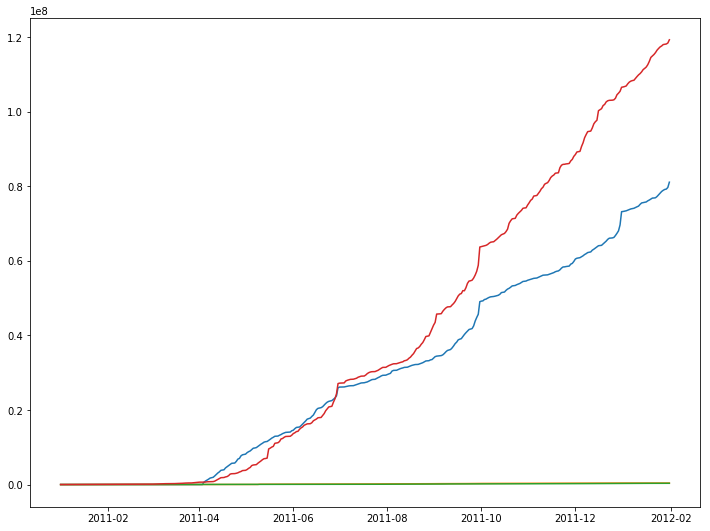

In [299]:
plt.figure(figsize=(12,9))
plt.plot(ele_a.cumsum())

把时间作为列，党派作为行来观察,unstack('contb_receipt')

In [300]:
ele_t = ele_a.stack('party')
ele_t2 = ele_t.unstack('contb_receipt_dt')
ele_t2

contb_receipt_amt                                   \
contb_receipt_dt        2011-01-01 2011-01-03 2011-01-04 2011-01-12   
party                                                                 
Democrat                       0.0        0.0        0.0        0.0   
Libertarian                    0.0        0.0        0.0        0.0   
Reform                         0.0        0.0        0.0        0.0   
Republican                  8600.0     4800.0     5000.0     4150.0   

                                                                         \
contb_receipt_dt 2011-01-13 2011-01-14 2011-01-15 2011-01-16 2011-01-17   
party                                                                     
Democrat                0.0        0.0        0.0        0.0        0.0   
Libertarian             0.0        0.0        0.0        0.0        0.0   
Reform                  0.0        0.0        0.0        0.0        0.0   
Republican           4000.0     6000.0      500.0      750.0      500.0   

                                ...                                       \
contb_receipt_dt 2011-01-18     ...     2012-01-22 2012-01-23 2012-01-24   
party                           ...                                        
Democrat                0.0     ...       67194.23  337307.07  458909.23   
Libertarian             0.0     ...           0.00       0.00       0.00   
Reform                  0.0     ...         450.00     225.00     500.00   
Republican           4800.0     ...      507168.71  645477.15  462233.66   

                                                                         \
contb_receipt_dt 2012-01-25 2012-01-26 2012-01-27 2012-01-28 2012-01-29   
party                                                                     
Democrat          438949.32  450268.94  305785.47  235492.85   93177.00   
Libertarian            0.00       0.00       0.00       0.00       0.00   
Reform               282.00      25.00    3176.37     175.00     200.00   
Republican        416931.39  256406.86  368441.82   82775.80   75220.02   

                                         
contb_receipt_dt 2012-01-30  2012-01-31  
party                                    
Democrat          435921.72  1418410.31  
Libertarian            0.00        0.00  
Reform               130.00      150.00  
Republican        255204.80   869890.41  

[4 rows x 376 columns]

使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [301]:
ele_a.stack()

contb_receipt_amt
contb_receipt_dt party                         
2011-01-01       Democrat                  0.00
                 Libertarian               0.00
                 Reform                    0.00
                 Republican             8600.00
2011-01-03       Democrat                  0.00
                 Libertarian               0.00
                 Reform                    0.00
                 Republican             4800.00
2011-01-04       Democrat                  0.00
                 Libertarian               0.00
                 Reform                    0.00
                 Republican             5000.00
2011-01-12       Democrat                  0.00
                 Libertarian               0.00
                 Reform                    0.00
                 Republican             4150.00
2011-01-13       Democrat                  0.00
                 Libertarian               0.00
                 Reform                    0.00
                 Republican             4000.00
2011-01-14       Democrat                  0.00
                 Libertarian               0.00
                 Reform                    0.00
                 Republican             6000.00
2011-01-15       Democrat                  0.00
                 Libertarian               0.00
                 Reform                    0.00
                 Republican              500.00
2011-01-16       Democrat                  0.00
                 Libertarian               0.00
...                                         ...
2012-01-24       Reform                  500.00
                 Republican           462233.66
2012-01-25       Democrat             438949.32
                 Libertarian               0.00
                 Reform                  282.00
                 Republican           416931.39
2012-01-26       Democrat             450268.94
                 Libertarian               0.00
                 Reform                   25.00
                 Republican           256406.86
2012-01-27       Democrat             305785.47
                 Libertarian               0.00
                 Reform                 3176.37
                 Republican           368441.82
2012-01-28       Democrat             235492.85
                 Libertarian               0.00
                 Reform                  175.00
                 Republican            82775.80
2012-01-29       Democrat              93177.00
                 Libertarian               0.00
                 Reform                  200.00
                 Republican            75220.02
2012-01-30       Democrat             435921.72
                 Libertarian               0.00
                 Reform                  130.00
                 Republican           255204.80
2012-01-31       Democrat            1418410.31
                 Libertarian               0.00
                 Reform                  150.00
                 Republican           869890.41

[1504 rows x 1 columns]

查看候选人姓名cand_nm和政治献金捐献者职业contbr_occupation，以及捐献情况。能看出各个候选人主要的支持者分布情况  
练习：groupy，sum()求和

In [302]:
ele

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
478480,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475327,C00496067,P00003608,"Cain, Herman","STOLTENBERG, WAYNE",WESTLAKE,TX,762629076,CINCO RESOURCES,CFO,5200.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
475328,C00496067,P00003608,"Cain, Herman","TRIBBLE, JAMES",HOUSTON,TX,770795026,NONE,RETIRED,1000.0,2011-01-01,NaN,NaN,NaN,SA17A,755790,Republican
478481,C00496067,P00003608,"Cain, Herman","SIDNEY, SCOTT",CEDARBURG,WI,530122317,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
475329,C00496067,P00003608,"Cain, Herman","DAVIS, JEREMY S MR.",HOUSTON,TX,770252267,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,NaN,NaN,NaN,SA17A,755790,Republican
469861,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
469860,C00496067,P00003608,"Cain, Herman","WHITWAM, DAVID",SAINT JOSEPH,MI,490851744,INFORMATION REQUESTED,INFORMATION REQUESTED,2500.0,2011-01-04,NaN,NaN,NaN,SA17A,755790,Republican
478476,C00496067,P00003608,"Cain, Herman","ANDINGF, AL",MONONA,WI,537162503,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463851,C00496067,P00003608,"Cain, Herman","MANN, KEITH",UNIVERSITY PARK,FL,342012269,US ARMY,SOLDIER,500.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican
463850,C00496067,P00003608,"Cain, Herman","COOPER, ROBERT",ORLANDO,FL,328264121,TEAM HEALTH,PHYSICIAN,250.0,2011-01-12,NaN,NaN,NaN,SA17A,755790,Republican


In [303]:
ele.groupby(['cand_nm']).sum()

,contb_receipt_amt,file_num
cand_nm,,
"Bachmann, Michelle",2.607916e+06,9290403803
"Cain, Herman",7.010446e+06,15171098077
"Gingrich, Newt",9.271751e+06,21160203299
"Huntsman, Jon",3.200693e+06,3135477762
"Johnson, Gary Earl",4.132769e+05,532194207
"McCotter, Thaddeus G",3.703000e+04,56421078
"Obama, Barack",8.105758e+07,222412658564
"Paul, Ron",1.543576e+07,67163097646
"Pawlenty, Timothy",4.238859e+06,3407191871


In [304]:
ele.groupby(['contbr_occupation']).sum()

,contb_receipt_amt,file_num
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.00,756218
AREA VICE PRESIDENT,250.00,756218
RESEARCH ASSOCIATE,100.00,756218
TEACHER,500.00,756218
THERAPIST,3900.00,2268654
(PART-TIME) SALES CONSULTANT & WRITER,285.00,1496730
(RETIRED),250.00,761750
-,8085.00,12951836
--,425.00,3046656


查看老兵主要支持谁：DISABLED VETERAN  
考察Series索引

In [311]:
cause = ele['contbr_occupation'] == 'DISABLED VETERAN'

In [313]:
sup = ele[cause]
sup

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
210809,C00431445,P80003338,"Obama, Barack","DEKLE, CHARLES R.",UPPER MARLBORO,MD,207748600,RETIRED,DISABLED VETERAN,160.00,2011-04-27,NaN,X,BEST EFFORTS UPDATE,SA17A,763233,Democrat
396211,C00495820,P80000748,"Paul, Ron","THORNELL, GARY ENOS MR.",BENTON,KY,420256409,NONE,DISABLED VETERAN,201.20,2011-06-05,NaN,NaN,NaN,SA17A,762896,Republican
464508,C00496067,P00003608,"Cain, Herman","ANDERSON, JOSEPH",GROVETOWN,GA,308134105,NONE,DISABLED VETERAN,100.00,2011-06-18,NaN,NaN,NaN,SA17A,755790,Republican
210810,C00431445,P80003338,"Obama, Barack","DEKLE, CHARLES R.",UPPER MARLBORO,MD,207748600,RETIRED,DISABLED VETERAN,160.00,2011-06-23,NaN,X,BEST EFFORTS UPDATE,SA17A,763233,Democrat
185264,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059,NOT EMPLOYED,DISABLED VETERAN,100.00,2011-07-08,NaN,NaN,NaN,SA17A,756218,Democrat
185140,C00431445,P80003338,"Obama, Barack","BAUER, JOSEPH",PROSPECT,KY,40059,NOT EMPLOYED,DISABLED VETERAN,85.00,2011-07-08,NaN,NaN,NaN,SA17A,756218,Democrat
420332,C00495820,P80000748,"Paul, Ron","CRAYCRAFT, SETH MR.",MIDDLETOWN,OH,450444916,DEPT OF VETERANS AFFAIRS,DISABLED VETERAN,20.12,2011-07-19,NaN,NaN,NaN,SA17A,763173,Republican
235014,C00431445,P80003338,"Obama, Barack","RORIE, FOREST",WADESBORO,NC,281707443,INFORMATION REQUESTED,DISABLED VETERAN,50.00,2011-07-22,NaN,NaN,NaN,SA17A,756218,Democrat
260154,C00431445,P80003338,"Obama, Barack","NOLAN, DIANA",SPRAKERS,NY,12166,DISABLED VETERAN,DISABLED VETERAN,50.00,2011-07-28,NaN,NaN,NaN,SA17A,756218,Democrat
184211,C00431445,P80003338,"Obama, Barack","BRYANT, J.L.",TOPEKA,KS,6.66122e+08,RET ARMY,DISABLED VETERAN,100.00,2011-08-04,NaN,NaN,NaN,SA17A,756218,Democrat


In [324]:
sup['cand_nm'].value_counts()

Obama, Barack     32
Paul, Ron         22
Santorum, Rick     3
Cain, Herman       3
Name: cand_nm, dtype: int64

把索引变成列,Series.reset_index()

In [328]:
sup['cand_nm'].reset_index()

,index,cand_nm
0,210809,"Obama, Barack"
1,396211,"Paul, Ron"
2,464508,"Cain, Herman"
3,210810,"Obama, Barack"
4,185264,"Obama, Barack"
5,185140,"Obama, Barack"
6,420332,"Paul, Ron"
7,235014,"Obama, Barack"
8,260154,"Obama, Barack"
9,184211,"Obama, Barack"


找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [339]:
ele.groupby(['cand_nm'])['contb_receipt_amt'].max()

cand_nm
Bachmann, Michelle                   3022.00
Cain, Herman                        10000.00
Gingrich, Newt                       5100.00
Huntsman, Jon                        5000.00
Johnson, Gary Earl                   2500.00
McCotter, Thaddeus G                 4000.00
Obama, Barack                     1944042.43
Paul, Ron                            5000.00
Pawlenty, Timothy                   10000.00
Perry, Rick                         10000.00
Roemer, Charles E. 'Buddy' III        200.00
Romney, Mitt                        12700.00
Santorum, Rick                       5000.00
Name: contb_receipt_amt, dtype: float64

In [340]:
ele['contb_receipt_amt'].max()

1944042.43

In [344]:
ele.query('contb_receipt_amt ==1944042.43 ')

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
176127,C00431445,P80003338,"Obama, Barack",OBAMA VICTORY FUND 2012 - UNITEMIZED,CHICAGO,IL,60680,NaN,NaN,1944042.43,2011-12-31,NaN,X,*,SA18,763233,Democrat
